    1. What is the question you hope to answer?
Does the S&P or the median House Price have an effect the Misery Index ?

    2. What data are you planning to use to answer that question?
I am planning on using metrics from three datasets (all metrics reported monthly) from quandl. The datasets that I am using are the Zillow, Yale, and US Misery. 

    3. What do you know about the data you're using so far?
So far, I found that the correlation between the Median House Price and the US Misery Index is approximately -.53 and the correlation between the S&P and the US Misery Index is approximately -.38. This is to say that both the median house price and S&P are negatively correlated with the US Misery Index. Also learned that the median house price increased by 30k from January 2018 to June 2019. Durning this same time period, the misery index has decreased from 6.25 to 5.3. As part of the misery index, the inflation rate has been varying more than the unemployment rate.

    4. Why did you choose this topic?
I always had a interest in topics related to housing, stocks, and the economy.Additionally, I never knew what the misery index was until I found a dataset in regards to it in Quandl. 

In [1]:
import scipy.stats as stats
import numpy as np

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import quandl
import pandas as pd


quandl.ApiConfig.api_key = 'TQnvQmTWu3_mxisgXmye'
medianlistprice=quandl.get('ZILLOW/M1_MLPAH', start_date='2017-12-31', end_date='2019-12-31') 
medianpricecut=quandl.get('ZILLOW/M1_MPCDAH', start_date='2017-12-31', end_date='2019-12-31') 
percentpricecut=quandl.get('ZILLOW/M1_PLPRAH', start_date='2017-12-31', end_date='2019-12-31') 



In [3]:

medianlistprice_df=pd.DataFrame(medianlistprice)
medianpricecut_df=pd.DataFrame(medianpricecut)
percentpricecut_df=pd.DataFrame(percentpricecut)


In [4]:

medianlistprice_df["medianlistprice"]=medianlistprice_df.values
medianpricecut_df["medianpricecut"]=medianpricecut_df.values
percentpricecut_df["percentpricecut"]=percentpricecut_df.values


In [5]:

del medianlistprice_df["Value"]
del medianpricecut_df["Value"]
del percentpricecut_df["Value"]


In [7]:

PriceConcat=pd.concat([medianlistprice_df,medianpricecut_df],axis=1,join="inner")
PriceConcatFinal=pd.concat([PriceConcat,percentpricecut_df],axis=1,join="inner")

In [8]:
#a healthy misery index is between 6 and 7 percent.
quandl.ApiConfig.api_key = 'TQnvQmTWu3_mxisgXmye'
Misery=quandl.get('USMISERY/INDEX', start_date='2017-12-31', end_date='2019-12-31')

In [9]:
Misery_df=pd.DataFrame(Misery)

In [10]:
MasterConcat=pd.concat([PriceConcatFinal,Misery_df],axis=1,join="inner")

In [11]:
quandl.ApiConfig.api_key = 'TQnvQmTWu3_mxisgXmye'
SPCOMP=quandl.get('YALE/SPCOMP', start_date='2017-12-31', end_date='2019-12-31')

In [12]:
SPCOMP_df=pd.DataFrame(SPCOMP)
SPCOMP_df_new = SPCOMP_df.rename(index={'Year': 'Date'})

In [13]:
MasterConcat=pd.concat([PriceConcatFinal,SPCOMP_df_new],axis=1,join="inner")

In [14]:
MasterConcatFinal=pd.concat([MasterConcat,Misery_df],axis=1,join="inner")

In [15]:
print(MasterConcatFinal)

            medianlistprice  medianpricecut  percentpricecut  S&P Composite  \
2017-12-31         259900.0          6100.0         8.617971    2664.340000   
2018-01-31         259990.0          7000.0        12.156286    2789.800000   
2018-02-28         266900.0          7500.0        11.199670    2705.160000   
2018-03-31         269990.0          8000.0        11.932383    2702.770000   
2018-04-30         275400.0          9000.0        12.252889    2653.630000   
2018-05-31         279800.0          9600.0        13.967016    2701.490000   
2018-06-30         279900.0          9900.0        14.811721    2754.350000   
2018-07-31         279500.0          9100.0        15.996208    2793.640000   
2018-08-31         275999.0          9000.0        16.981095    2857.820000   
2018-09-30         279000.0          9000.0        16.550095    2901.500000   
2018-10-31         279000.0          9000.0        17.851454    2785.460000   
2018-11-30         279000.0          7400.0        1

Here is the variation in Inflation 0.4141356062876711
Here is the variation in unemployment 0.2033319294104753


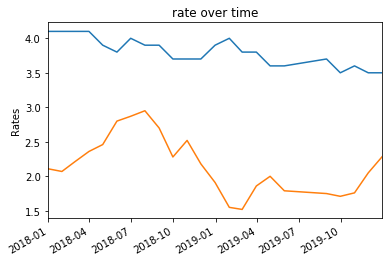

In [43]:

pricegrp=MasterConcatFinal["medianlistprice"]
miserygrp=MasterConcatFinal["Misery Index"]
unemploygrp=MasterConcatFinal["Unemployment Rate"]
Inflgrp=MasterConcatFinal["Inflation Rate"]

#miserygrp.plot(title="Misery Index over time") 
#sns.mpl.pyplot.ylabel("Misery Index") 

unemploygrp.plot(title="rate over time")
Inflgrp.plot()
sns.mpl.pyplot.ylabel("Rates") 
Unemploystd=MasterConcatFinal["Unemployment Rate"].std()
Inflstd=MasterConcatFinal["Inflation Rate"].std()

Unemploymean=MasterConcatFinal["Unemployment Rate"].mean()
Inflstdmean=MasterConcatFinal["Inflation Rate"].mean()

print(f'Here is the variation in Inflation {Inflstd}')
print(f'Here is the variation in unemployment {Unemploystd}')

Observations of Corrlations in the dataframe (MasterConcat) that includes housing information from zillow and the misery index. 


In [ ]:
MasterConcatFinal.corr()

In [ ]:
MasterConcatFinal["Month_Year"]=pd.to_datetime(MasterConcatFinal.index.values,format="%m-%d-%y")

In [ ]:

MasterConcatFinal["Month"]=MasterConcatFinal["Month_Year"].dt.month
MasterConcatFinal["Year"]=MasterConcatFinal["Month_Year"].dt.year
print(MasterConcatFinal["Month"])
#if spmonth=MasterConcatFinal.groupby()
#NewMonth[m+1 for m in 
#MasterConcatFinal["Month_Year"]
def Quarter(month):
        if month==1:
            return 1
        elif month==2:
            return 1
        elif month==3:
            return 1
        elif month==4:
            return 2
        elif month==5:
            return 2
        elif month==6:
            return 2
        elif month==7:
            return 3
        elif month==8:
            return 3
        elif month==9:
            return 3
        elif month==10:
            return 4
        elif month==11:
            return 4
        else:
            return 4
MasterConcatFinal["Quarter"]=MasterConcatFinal.apply(\
                        lambda x:\
                                Quarter( x['Month']),
                                      axis=1)
print(MasterConcatFinal)

In [ ]:
x=pd.DataFrame(MasterConcatFinal.groupby(["Quarter"]).mean())
#x.corr()
y=pd.DataFrame(MasterConcatFinal.groupby(["Month"]).mean())
y.corr()